<a href="https://colab.research.google.com/github/Alan-Hans/Portafolio-DataScientist/blob/main/BreastCancer_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Wisconsin (Diagnostic)
This project is about breast cancer and its prediction based on data. In this project different prediction methods will be applied including cross validation.
You can find the data in https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns 
import io as BytesIO
import io


In [35]:
from google.colab import files
uploaded = files.upload()

Saving data-1.csv to data-1 (1).csv


In [36]:
data = pd.read_csv(io.BytesIO(uploaded["data-1.csv"]))
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [38]:
data = data.drop('Unnamed: 32', inplace=False, axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

For purpose of the predicction we going to take diagnoses column.

In [126]:
X = data.iloc[:,2:]
Y_linear = Y.copy()
Y = data.iloc[:,1]
Y_linear = pd.get_dummies(Y_linear, columns = [1], drop_first = True)


In [40]:
Y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

To apply differents models, we going to separate in train data and test data with 70% and 30% respectively.

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)
X_train_linear, X_test_linear, Y_train_linear, Y_test_linear = train_test_split(X, Y_linear, test_size = 0.3, random_state = 4)

In [64]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, Y_train)
resultado = modelo.score(X_test, Y_test)
Y_pred = modelo.predict(X_test)
resultado

0.9064327485380117

In [120]:
from sklearn.ensemble import RandomForestClassifier
modelo = RandomForestClassifier()
modelo.fit(X_train, Y_train)
Y_pred = modelo.predict(X_test)
resultado = modelo.score(X_test, Y_test)
resultado 

0.9298245614035088

We can deploy a graph between the prediction and the real one.

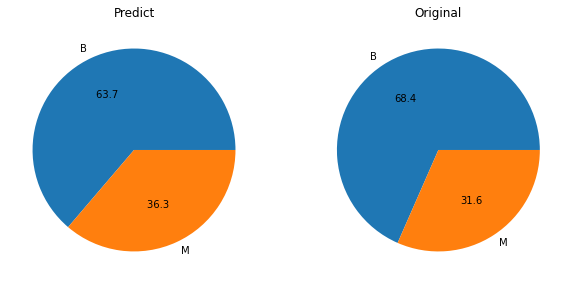

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,10))
axes[0].pie(Y_pred.value_counts(), labels=["B","M"],autopct="%0.1f ");
axes[0].set_title("Predict");
axes[1].pie(Y_test.value_counts(), labels=["B","M"], autopct="%0.1f");
axes[1].set_title("Original");



In [65]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

lr = LinearRegression()  
lr.fit(X_train_linear, Y_train_linear)
Y_pred = lr.predict(X_test_linear)
resultado = lr.score(X_test_linear, Y_test_linear)
resultado

0.7343050403174682

In [90]:
import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error

xgb_model = xgb.XGBRegressor(objective="count:poisson", random_state=44, max_depth= 10, 
eta = 0.3)
xgb_model.fit(X_train_linear, Y_train_linear)
y_pred = xgb_model.predict(X_test)
resultado = xgb_model.score(X_test_linear, Y_test_linear)
resultado



0.8541451788969259

In [112]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()  
knn.fit(X_train_linear, Y_train_linear)
y_pred = knn.predict(X_test_linear)
resultado = knn.score(X_test_linear, Y_test_linear)
resultado


0.6481481481481481

For this exercise we use 5 differents methods to predict the data and Random decision tree clasifier show best results.